Quest 04: 통계 기초

1. 통계 문제

문제 1)

In [1]:
import scipy.stats as stats

# 데이터 입력
sample_mean = 495
population_mean = 500
sample_std = 10
sample_size = 25

# t-통계량 계산
t_statistic = (sample_mean - population_mean) / (sample_std / (sample_size**0.5))

# p-값 계산
p_value = stats.t.sf(abs(t_statistic), sample_size - 1) * 2  # 양측 검정

# 유의수준
alpha = 0.05

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


문제 2) 분포 시각화

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# t-분포 생성
df = sample_size - 1  # 자유도
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)  # x축 범위
t_dist = stats.t.pdf(x, df)  # t-분포 확률 밀도 함수

In [5]:
# t-통계량 및 임계값 계산
t_statistic = -2.5  # 이전에 계산한 t-통계량
critical_value = stats.t.ppf(alpha / 2, df)  # 임계값 (양측 검정)

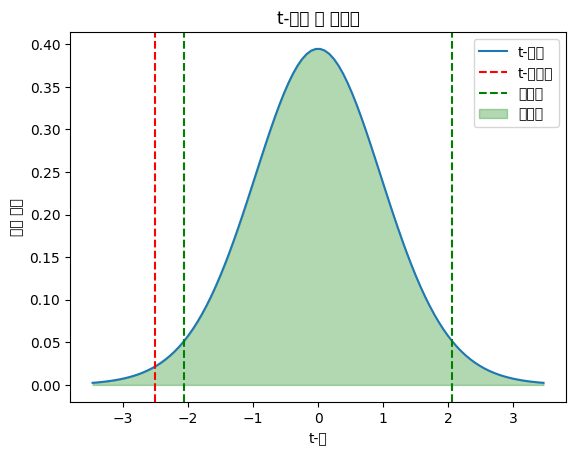

In [11]:
plt.plot(x, t_dist, label='t-분포')
plt.axvline(t_statistic, color='red', linestyle='--', label='t-통계량')
plt.axvline(critical_value, color='green', linestyle='--', label='임계값')
plt.axvline(-critical_value, color='green', linestyle='--')  # 반대쪽 임계값
plt.fill_between(x, t_dist, where=(x < -critical_value) | (x > critical_value), color='green', alpha=0.3, label='기각역')
plt.legend()
plt.title('t-분포 및 기각역')
plt.xlabel('t-값')
plt.ylabel('확률 밀도')
plt.show()

문제 3) 단일 t 표본 검정

In [12]:
import numpy as np
import scipy.stats as stats

# 데이터 입력
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터
sample_mean = np.mean(sample_scores)
population_mean = 75
sample_size = len(sample_scores)

# 표본 표준편차 계산
sample_std = np.std(sample_scores, ddof=1)  # ddof=1: 표본 표준편차 계산

# t-통계량 계산
t_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# p-값 계산 (단측 검정)
p_value = stats.t.sf(t_stat, sample_size - 1)

# 유의수준
alpha = 0.05

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


문제 4) 독립 표본 t 검정

In [13]:
import numpy as np
import scipy.stats as stats

# 데이터 입력
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

# t-검정 수행
t_stat, p_value = stats.ttest_ind(group_A, group_B)

# 유의수준
alpha = 0.05

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


문제 5) 대응표본 t검정

In [47]:
import numpy as np
import scipy.stats as stats

before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# Calculate the weight difference
weight_difference = before - after

# Perform the paired samples t-test
t_stat, p_value = stats.ttest_rel(before, after)

# Significance level
alpha = 0.05

# Print the results
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")  # Updated print statement
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")  # Updated print statement

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


문제 6) 표본 추출

In [14]:
import kagglehub
import os
import pandas as pd

In [15]:
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])

100%|██████████| 14.5M/14.5M [00:01<00:00, 11.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


In [46]:
# Calculate TotalPrice  (This line should be before extracting UK data)
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

# Extract data for the United Kingdom
uk_retail = retail[retail['Country'] == 'United Kingdom']

for sample_size in [30, 100, 300]:
  sample = uk_retail['TotalPrice'].sample(n=sample_size)
  mean_total_price = sample.mean()
  print(f"Sample size: {sample_size}, Mean TotalPrice: {mean_total_price:.2f}")

Sample size: 30, Mean TotalPrice: 17.87
Sample size: 100, Mean TotalPrice: 13.62
Sample size: 300, Mean TotalPrice: 19.78


문제 7) 신뢰구간

In [21]:
import scipy.stats as stats
import pandas as pd
import kagglehub
import os

In [24]:
import shutil

In [25]:
# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)

# Copy files to Colab workspace
source_dir = path
dest_dir = '/content/online-retail-ii-uci'
os.makedirs(dest_dir, exist_ok=True)
for filename in os.listdir(source_dir):
    source_path = os.path.join(source_dir, filename)
    dest_path = os.path.join(dest_dir, filename)
    shutil.copy(source_path, dest_path)
print("Dataset files copied to:", dest_dir)

# Read the dataset from the copied location
retail = pd.read_csv('/content/online-retail-ii-uci/online_retail_II.csv')


Path to dataset files: /kaggle/input/online-retail-ii-uci
Dataset files copied to: /content/online-retail-ii-uci


In [29]:
import scipy.stats as stats
# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()  # Indented by 4 spaces
    std_err = stats.sem(data)  # Indented by 4 spaces
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)  # Indented by 4 spaces
    return mean, interval

In [42]:
retail = pd.read_csv('/content/online-retail-ii-uci/online_retail_II.csv')

In [43]:
# Calculate TotalPrice  (This line should be before extracting UK data)
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

# Extract TotalPrice for the United Kingdom
uk_data = retail[retail['Country'] == 'United Kingdom']['TotalPrice']

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)  # random_state로 재현성 확보
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 11.88, 95% CI: (np.float64(6.37841466090658), np.float64(17.38425200576009))
Sample size: 100, Mean: 16.09, 95% CI: (np.float64(11.142955150004974), np.float64(21.02784484999502))
Sample size: 300, Mean: 13.34, 95% CI: (np.float64(11.264027626023802), np.float64(15.424439040642865))


문제 8)

In [34]:
import pandas as pd
import scipy.stats as stats
import kagglehub
import os
import shutil

In [39]:
# Download the dataset
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)

# Copy files to Colab workspace
source_dir = path
dest_dir = '/content/online-retail-ii-uci'
os.makedirs(dest_dir, exist_ok=True)
for filename in os.listdir(source_dir):
    source_path = os.path.join(source_dir, filename)
    dest_path = os.path.join(dest_dir, filename)
    shutil.copy(source_path, dest_path)
print("Dataset files copied to:", dest_dir)

# Read the dataset from the copied location
retail = pd.read_csv('/content/online-retail-ii-uci/online_retail_II.csv')

Path to dataset files: /kaggle/input/online-retail-ii-uci
Dataset files copied to: /content/online-retail-ii-uci


In [41]:
# Read the dataset from the copied location
retail = pd.read_csv('/content/online-retail-ii-uci/online_retail_II.csv')

# Calculate TotalPrice
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

# Extract TotalPrice for UK and Germany
uk_prices = retail[retail['Country'] == 'United Kingdom']['TotalPrice']
germany_prices = retail[retail['Country'] == 'Germany']['TotalPrice']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(uk_prices, germany_prices, equal_var=True)  # Assuming equal variances

# Significance level
alpha = 0.05

# Hypothesis test interpretation
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

t-값: -3.0762, p-value: 0.0021. 유의수준 0.05에서 귀무가설을 기각합니다. 영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


2. A/B 테스트

문제 9)

페이지 A 전환율: 80 / 1000 = 0.08

페이지 B 전환율: 22 / 200 = 0.11

- 페이지 B의 전환율이 페이지 A보다 높습니다 (0.11 > 0.08).
- 하지만, p-value 값을 확인해야 합니다. 만약 p-value가 유의수준(0.05)보다 작다면, 이 차이가 통계적으로 유의미하다고 해석할 수 있습니다.
- p-value가 유의수준보다 작다면, 패키지 기획자는 페이지 B를 통해 상품을 판매하는 것이 더 효과적이라고 판단하고 페이지 B를 채택해야 합니다.
- p-value가 유의수준보다 크다면, 전환율 차이가 우연에 의한 것일 가능성이 높습니다. 이 경우, 페이지 B의 노출 수를 늘려 추가적인 데이터를 수집하거나, 다른 요인들을 고려하여 페이지 A와 B의 효과를 재평가해야 합니다.



문제 10)

사례:

웹사이트 버튼 색상 변경 A/B 테스트

- 가설: 버튼 색상을 빨간색에서 파란색으로 변경하면 클릭률이 증가할 것이다.
- A/B 테스트 결과: 파란색 버튼의 클릭률이 빨간색 버튼보다 0.5% 높았고, 통계적으로 유의미한 결과를 얻었습니다 (p-value < 0.05).
- 효과 크기: 0.5% 클릭률 증가는 통계적으로 유의하지만, 실질적으로 큰 차이가 아닐 수 있습니다.

A/B 테스트 결과가 통계적으로 유의하더라도 효과 크기가 작다면, 비즈니스 측면과 기술적 측면을 종합적으로 고려하여 의사결정을 해야 합니다. 작은 변화라도 비즈니스 목표에 긍정적인 영향을 미치고, 변경 비용이 적다면 적용하는 것이 합리적입니다. 하지만 효과가 미미하고 비용이 크거나, 결과의 신뢰도가 낮다면, 추가적인 검토가 필요합니다.